Unit 3- Session 4: 
# Feature Engineering and Dimensionality Reduction

## What is feature engineering?

- Process of **transforming raw data into features** that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

## Data types

 - **Numerical**
     - **Discrete**: countable, finite
     - **Continuous**: uncountable, infinite
 - **Categorical**
     - **Ordinal**: ordered
        e.g grades, rankings, ratings, etc.
     - **Nominal**: unordered
        e.g country, state, city, education level, etc.
 - **Text**
 - **Image**
 - **Audio**
 - **Video**
 - **Geospatial**

## Common problems with raw data

- **Missing values**
- **Outliers**
- **Different scales**
- **Different units**

## Objective of feature engineering

- **Simplify** the data
    - e.g. group rare categories into a single category
    - Complex system has many points of failure.
    - If you do not know how it works, you cannot fix it when it breaks.
- **Extract** the most important information from the raw data
    For example from a date column, we can extract the year, month, day, day of the week, etc.
- **Transform** the data into a format suitable for the machine learning algorithm
    - e.g. convert text to numbers, convert categorical variables to dummy variables
- **Reduce** the dimensionality of the data
    - e.g. PCA, LDA, etc.
- **Create** new features
    - e.g. feature interactions, polynomial features, etc.

## Case Study: Predicting the price of a house

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
housing = pd.read_csv('datasets/housing/housing.csv')

In [3]:
print(housing.shape)
housing.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### `median_income`

- **Numerical** (continuous)
- **Scale**: 3.5 - 15.0
- **Unit**: tens of thousands of dollars
- **Meaning**: median income of the block group (measured in tens of thousands of US Dollars)
- **Example**: 3.5, 7.0, 8.0, 15.0, etc.

### Steps of converting `median_income` to a categorical variable

- **Step 1**: Define bins (or groups)
     - e.g. 0 - 3, 3 - 6, 6 - 9, 9 - 12, 12 - 15
- **Step 2**: Assign each value to a bin
     - e.g. poor, lower middle class, middle class, upper middle class, rich
- Step 3: Convert the categorical variable to dummy variables

In [4]:
# Convert `median_income` to categorical variable
bins = [0, 1.5, 3, 4.5, 6, np.inf]
labels = ['poor', 'lower', 'middle', 'upper', 'rich']
# labels = [0, 1, 2, 3, 4]
housing['income_cat'] = pd.cut(housing['median_income'], bins, labels=labels)
housing['income_cat'].value_counts().sort_index()

income_cat
poor       822
lower     6581
middle    7236
upper     3639
rich      2362
Name: count, dtype: int64

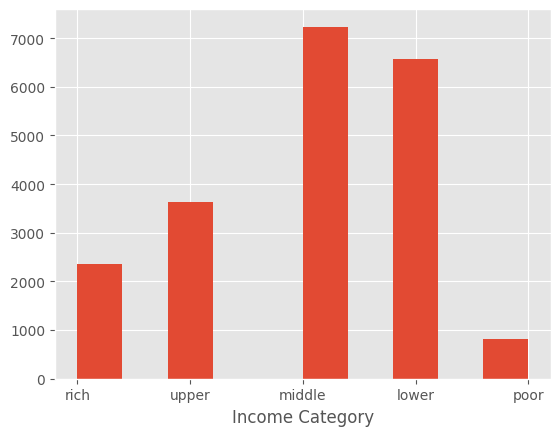

In [5]:
housing['income_cat'].hist()
plt.xlabel('Income Category')
plt.show()

### Types of discretization

- **Equal width discretization**
    - **Advantages**: easy to implement
    - **Disadvantages**: sensitive to outliers
- **Equal frequency discretization**
    - **Advantages**: less sensitive to outliers
    - **Disadvantages**: may generate intervals with different lengths
- **Custom discretization**
    - **Advantages**: can be more accurate
    - **Disadvantages**: time consuming, need domain knowledge
- Decision tree binning
    - Advantages: can capture non-linear relationships
    - Disadvantages: prone to overfitting

median_income
(0.485, 4.125]    13167
(4.125, 7.75]      6665
(7.75, 11.375]      674
(11.375, 15.0]      134
Name: count, dtype: int64


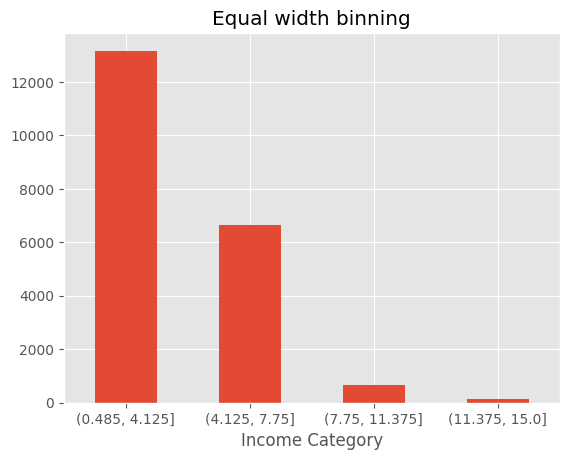

In [6]:
# Equal width binning
print(pd.cut(housing['median_income'], bins=4).value_counts().sort_index())
pd.cut(housing['median_income'], bins=4).value_counts().plot(kind='bar', rot=0, title='Equal width binning')
plt.xlabel('Income Category')
plt.show()

median_income
(0.499, 2.563]    5160
(2.563, 3.535]    5160
(3.535, 4.743]    5160
(4.743, 15.0]     5160
Name: count, dtype: int64


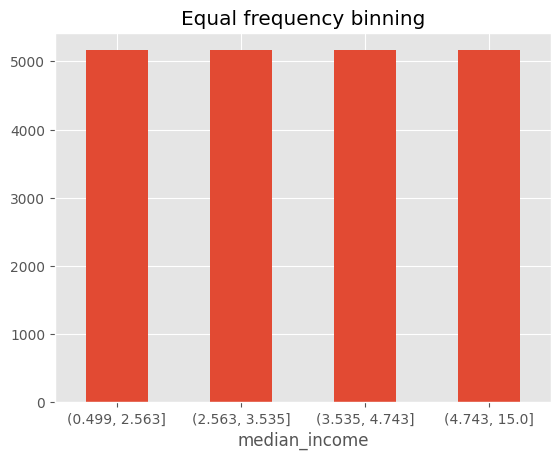

In [7]:
# Equal frequency binning
print(pd.qcut(housing['median_income'], q=4).value_counts().sort_index())
pd.qcut(housing['median_income'], q=4).value_counts().plot(kind='bar', rot=0, title='Equal frequency binning')
plt.show()

&nbsp;

----

&nbsp;

## Categorical Data

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,rich
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,rich
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,rich
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,upper
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,middle


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


### Categorical data encoding `ocean_proximity`

In [10]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
cat_encoder = OneHotEncoder(categories=[['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']])
housing_cat_1hot = cat_encoder.fit_transform(housing[['ocean_proximity']])
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [13]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],
       dtype=object)]

In [14]:
pd.get_dummies(housing[['ocean_proximity']], drop_first=True).head()

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[['ocean_proximity']])

In [17]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

&nbsp;

---

&nbsp;

### Numerical Features

### Problems with numerical features
 - **Outliers**
 - **Different scales**
 - **Different units**
 

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,rich
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,rich
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,rich
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,upper
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,middle


In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Total bedrooms range: 1 - 6445, 
median income range: 0 - 15, 
total rooms range: 2 - 39320

There are two common ways to get all attributes to have same scale:
 - **Min-max scaling** (normalization)
    - Scales the values to a range of 0 to 1
        - $x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$
- **Standardization**
    - Scales the values to have a mean of 0 and standard deviation of 1
        - $x_{standardized} = \frac{x - \mu}{\sigma}$
        - Less affected by outliers

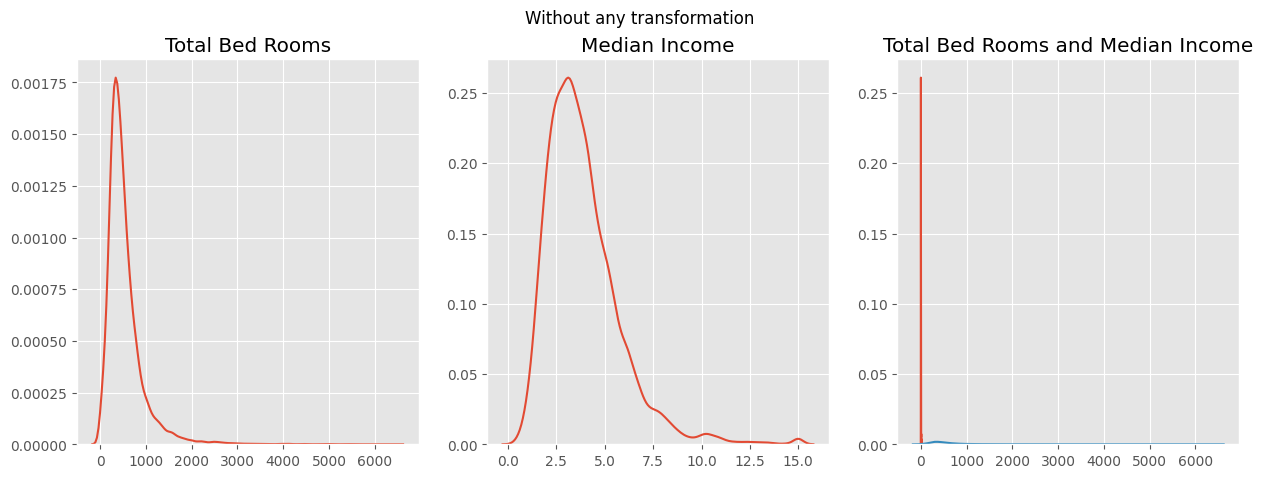

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('Total Bed Rooms')
sns.kdeplot(housing['total_bedrooms'], ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')

ax2.set_title('Median Income')
sns.kdeplot(housing['median_income'], ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3.set_title('Total Bed Rooms and Median Income')
sns.kdeplot(housing['median_income'], ax=ax3)
sns.kdeplot(housing['total_bedrooms'], ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')

# plt.title('Without any transformation')
fig.suptitle('Without any transformation')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

housing['median_income_standardized'] = std_scaler.fit_transform(housing[['median_income']])
housing['median_income_min_max_scaled'] = min_max_scaler.fit_transform(housing[['median_income']])

housing['total_bedrooms_standardized'] = std_scaler.fit_transform(housing[['total_bedrooms']])
housing['total_bedrooms_min_max_scaled'] = min_max_scaler.fit_transform(housing[['total_bedrooms']])

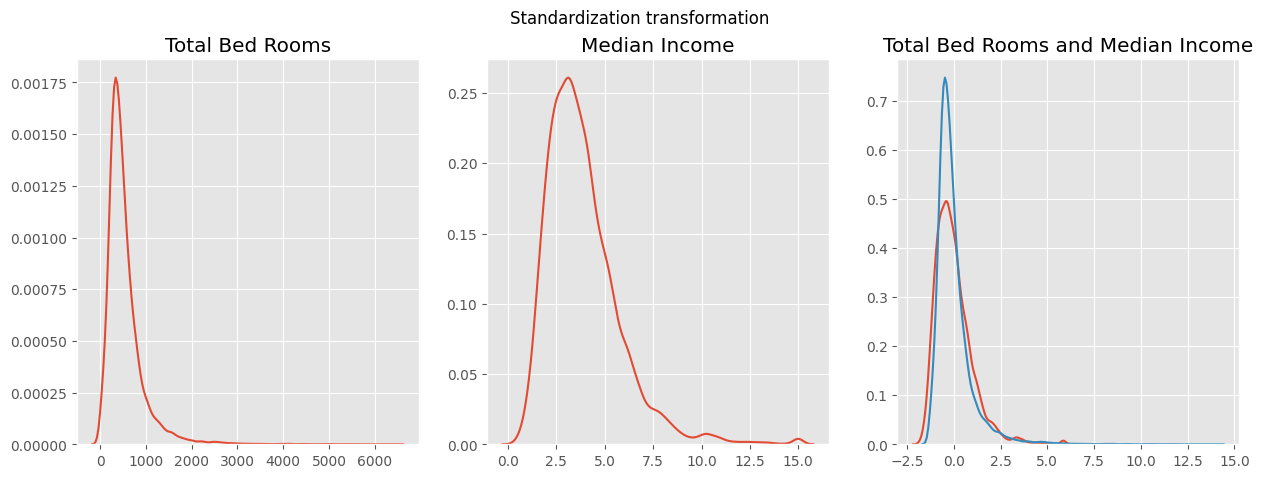

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('Total Bed Rooms')
sns.kdeplot(housing['total_bedrooms'], ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')

ax2.set_title('Median Income')
sns.kdeplot(housing['median_income'], ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3.set_title('Total Bed Rooms and Median Income')
sns.kdeplot(housing['median_income_standardized'], ax=ax3)
sns.kdeplot(housing['total_bedrooms_standardized'], ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')

# plt.title('Without any transformation')
fig.suptitle('Standardization transformation')
plt.show()

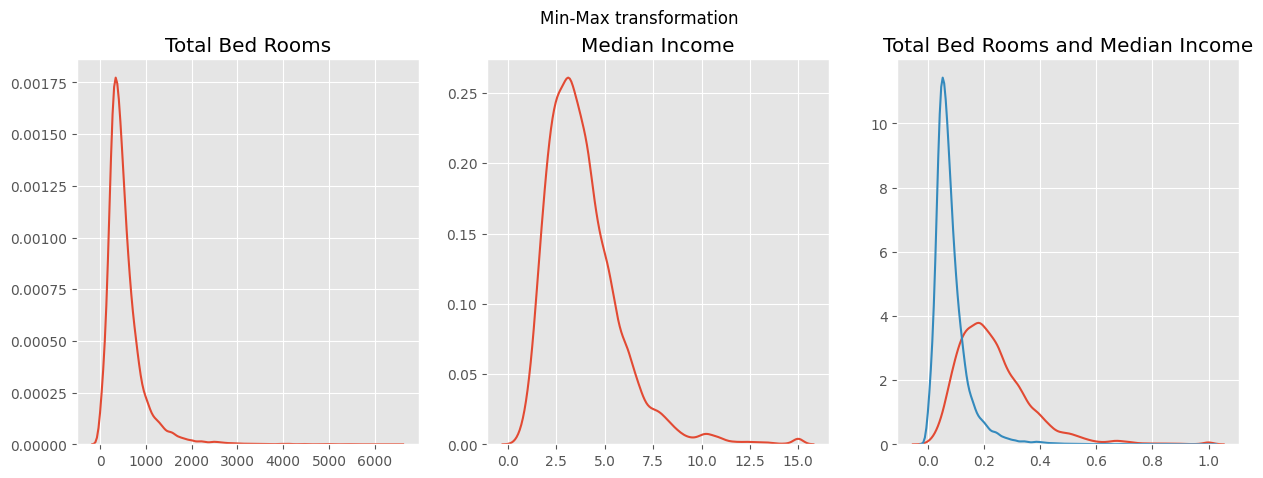

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('Total Bed Rooms')
sns.kdeplot(housing['total_bedrooms'], ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')

ax2.set_title('Median Income')
sns.kdeplot(housing['median_income'], ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3.set_title('Total Bed Rooms and Median Income')
sns.kdeplot(housing['median_income_min_max_scaled'], ax=ax3)
sns.kdeplot(housing['total_bedrooms_min_max_scaled'], ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')

# plt.title('Without any transformation')
fig.suptitle('Min-Max transformation')
plt.show()

### Effect of scaling

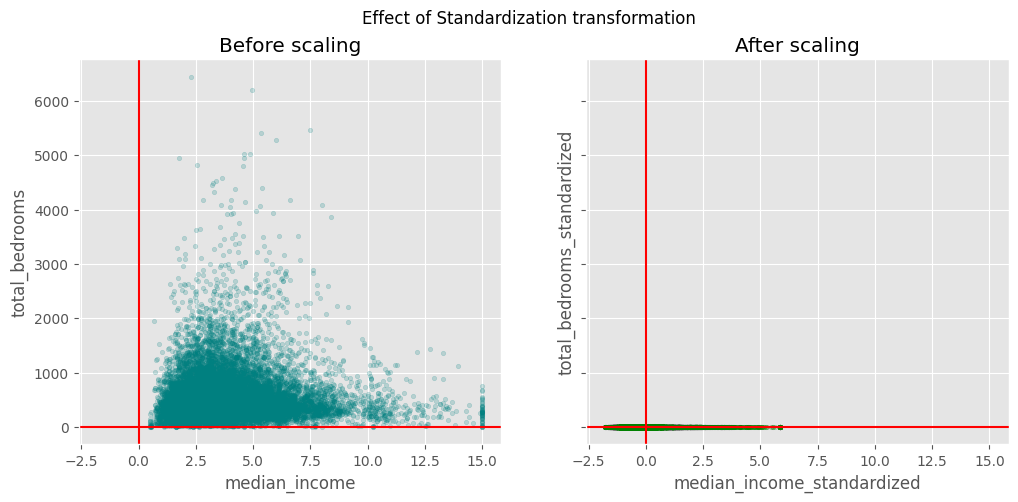

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(housing['median_income'], housing['total_bedrooms'], alpha=0.2, s=10, color='teal')
ax1.set_title('Before scaling')
ax1.set_xlabel('median_income')
ax1.set_ylabel('total_bedrooms')

ax2.scatter(housing['median_income_standardized'], housing['total_bedrooms_standardized'], alpha=0.2, s=10, color='green')
ax2.set_title('After scaling')
ax2.set_xlabel('median_income_standardized')
ax2.set_ylabel('total_bedrooms_standardized')

ax1.axvline(x=0, c="red", label="x=0")
ax1.axhline(y=0, c="red", label="y=0")

ax2.axvline(x=0, c="red", label="x=0")
ax2.axhline(y=0, c="red", label="y=0")


fig.suptitle('Effect of Standardization transformation')
plt.show()

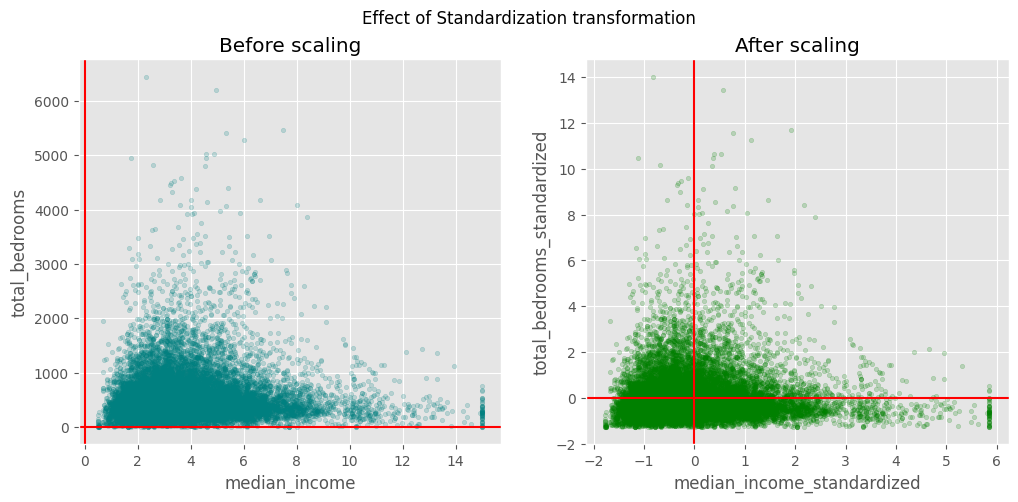

In [27]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(housing['median_income'], housing['total_bedrooms'], alpha=0.2, s=10, color='teal')
ax1.set_title('Before scaling')
ax1.set_xlabel('median_income')
ax1.set_ylabel('total_bedrooms')

ax2.scatter(housing['median_income_standardized'], housing['total_bedrooms_standardized'], alpha=0.2, s=10, color='green')
ax2.set_title('After scaling')
ax2.set_xlabel('median_income_standardized')
ax2.set_ylabel('total_bedrooms_standardized')

ax1.axvline(x=0, c="red", label="x=0")
ax1.axhline(y=0, c="red", label="y=0")

ax2.axvline(x=0, c="red", label="x=0")
ax2.axhline(y=0, c="red", label="y=0")


fig.suptitle('Effect of Standardization transformation')
plt.show()

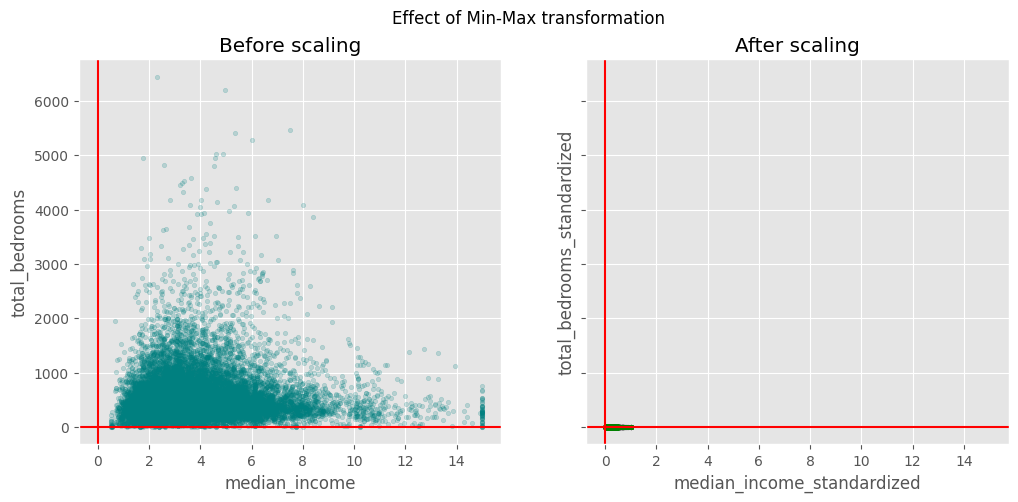

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(housing['median_income'], housing['total_bedrooms'], alpha=0.2, s=10, color='teal')
ax1.set_title('Before scaling')
ax1.set_xlabel('median_income')
ax1.set_ylabel('total_bedrooms')

ax2.scatter(housing['median_income_min_max_scaled'], housing['total_bedrooms_min_max_scaled'], alpha=0.2, s=10, color='green')
ax2.set_title('After scaling')
ax2.set_xlabel('median_income_standardized')
ax2.set_ylabel('total_bedrooms_standardized')

ax1.axvline(x=0, c="red", label="x=0")
ax1.axhline(y=0, c="red", label="y=0")

ax2.axvline(x=0, c="red", label="x=0")
ax2.axhline(y=0, c="red", label="y=0")


fig.suptitle('Effect of Min-Max transformation')
plt.show()

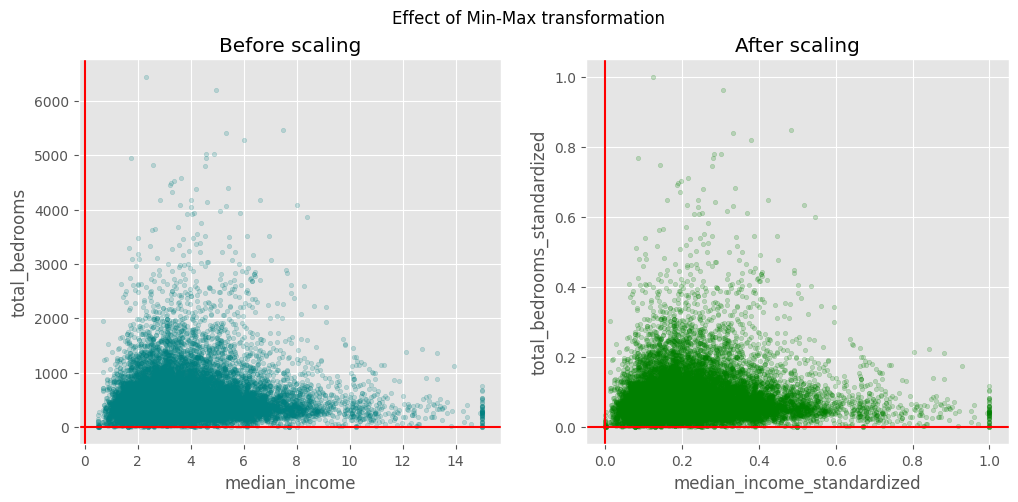

In [29]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(housing['median_income'], housing['total_bedrooms'], alpha=0.2, s=10, color='teal')
ax1.set_title('Before scaling')
ax1.set_xlabel('median_income')
ax1.set_ylabel('total_bedrooms')

ax2.scatter(housing['median_income_min_max_scaled'], housing['total_bedrooms_min_max_scaled'], alpha=0.2, s=10, color='green')
ax2.set_title('After scaling')
ax2.set_xlabel('median_income_standardized')
ax2.set_ylabel('total_bedrooms_standardized')

ax1.axvline(x=0, c="red", label="x=0")
ax1.axhline(y=0, c="red", label="y=0")

ax2.axvline(x=0, c="red", label="x=0")
ax2.axhline(y=0, c="red", label="y=0")


fig.suptitle('Effect of Min-Max transformation')
plt.show()

### Robust Scaler

\begin{equation}
X_{i-scaled} = \frac{X_i - X_{median} }{IQR}
\end{equation}


In [30]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
housing['median_income_robust'] = robust_scaler.fit_transform(housing[['median_income']])

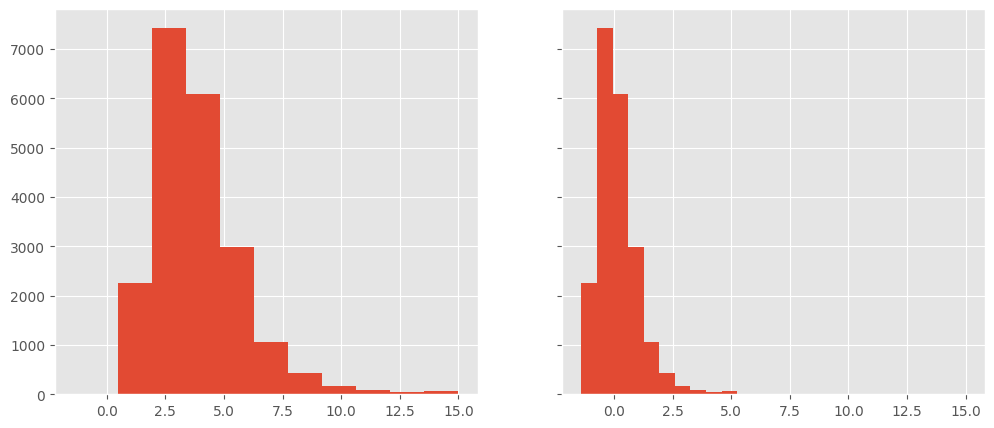

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)

ax1.hist(housing['median_income'])
ax2.hist(housing['median_income_robust'])

plt.show()

### Box-Cox Transformation

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
housing['median_income_box_cox'] = pt.fit_transform(housing[['median_income']])

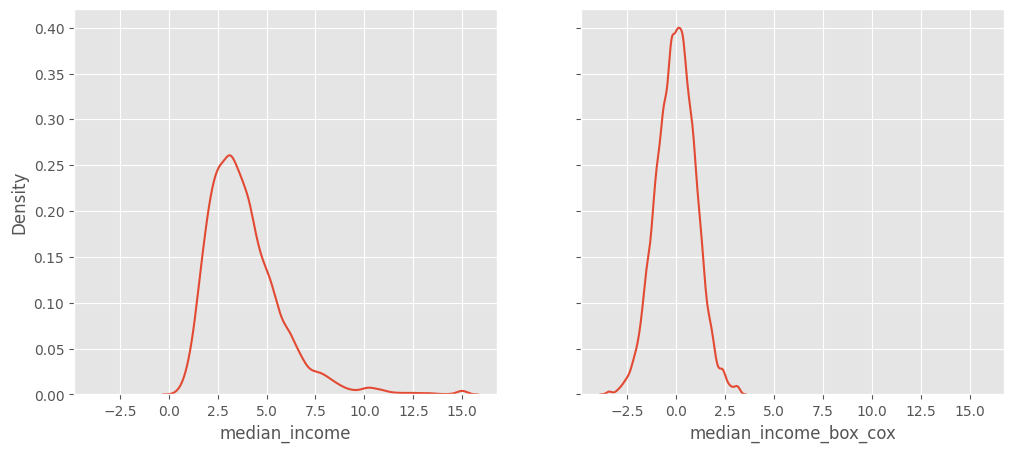

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)

sns.kdeplot(housing['median_income'], ax=ax1)
sns.kdeplot(housing['median_income_box_cox'], ax=ax2)

plt.show()

&nbsp;

---

&nbsp;

### Feature construction

In [34]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'median_income_standardized', 'median_income_min_max_scaled',
       'total_bedrooms_standardized', 'total_bedrooms_min_max_scaled',
       'median_income_robust', 'median_income_box_cox'],
      dtype='object')

In [35]:
columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
           'population', 'households', 'median_income',
           'median_house_value']
corr_matrix = housing[columns].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
Name: median_house_value, dtype: float64

In [36]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [37]:
columns

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [38]:
columns = columns + ['rooms_per_house', 'bedrooms_ratio', 'people_per_house']
corr_matrix = housing[columns].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

## Summary

Categorical data
 - If order matters -> OrdinalEncoder 
 - No order -> OneHotEncoder
 - Output variable -> LabelEncoder

Numerical data
 - If outliers and want to preserve -> RobustScaler
 - If you know min and max -> MinMaxScaler
 - 0 mean and unit variance -> StandardScaler
 - If distribution is skewed -> PowerTransformer (Box-Cox transformation, Yeo-Johnson transformation)
